# Home Field Advantage Visualized
How has home field advantage changed over the last 10 years?

### The Data
`historical_nfl_scores.csv` was collected from [The Football Database](https://www.footballdb.com/games/index.html)

In [121]:
#Import Packages
import pandas as pd
import numpy as np
from joypy import joyplot
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
sns.set(rc={'figure.figsize':(14.7,7.27)})
sns.set_theme(style="whitegrid")

In [122]:
scores = pd.read_csv('data/historical_nfl_scores.csv')
scores.columns = [col.lower() for col in scores.columns]
scores['home_pts_diff'] = scores['home_pts'] - scores['visitor_pts']
scores['year'] = pd.to_datetime(scores.date).dt.year
scores['home_win'] = np.where(scores['home_pts_diff'] > 0, 1, 0)
scores.head()

In [124]:
score_agg_by_year = (scores.groupby('year')['home_pts_diff']
                     .agg(['mean', 'median'])
                     .reset_index()
                    )

score_agg_by_year.rename(columns={'mean':'mean_home_pts_diff',
                                  'median':'median_home_pts_diff',
                                 },
                         inplace=True
                        )

score_agg_by_year['home_tm_win_percentage'] = ((scores.groupby('year')['home_win'].sum()
                                               / scores.groupby('year')['home_win'].count())
                                               .values)

In [125]:
score_agg_by_year

,year,mean_home_pts_diff,median_home_pts_diff,home_tm_win_percentage
0,2012,2.433594,3.0,0.570312
1,2013,3.105469,3.0,0.597656
2,2014,2.488281,3.0,0.566406
3,2015,1.579167,3.0,0.537500
4,2016,2.527344,3.0,0.570312
5,2017,2.452206,3.0,0.569853
6,2018,2.203125,3.0,0.597656
7,2019,-0.140625,1.0,0.515625
8,2020,0.141667,0.5,0.500000
9,2021,0.387879,-1.0,0.484848


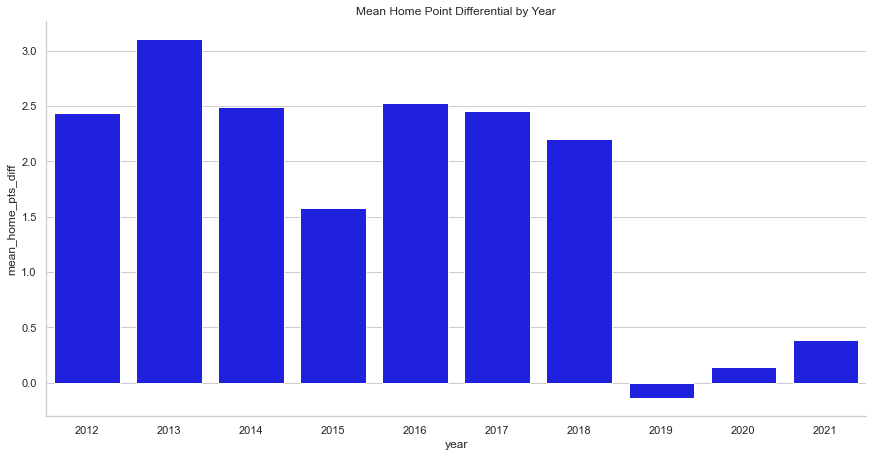

In [126]:
sns.barplot(data=score_agg_by_year,
            x='year',
            y='mean_home_pts_diff',
            color='blue'
           ).set_title('Mean Home Point Differential by Year')

sns.despine();

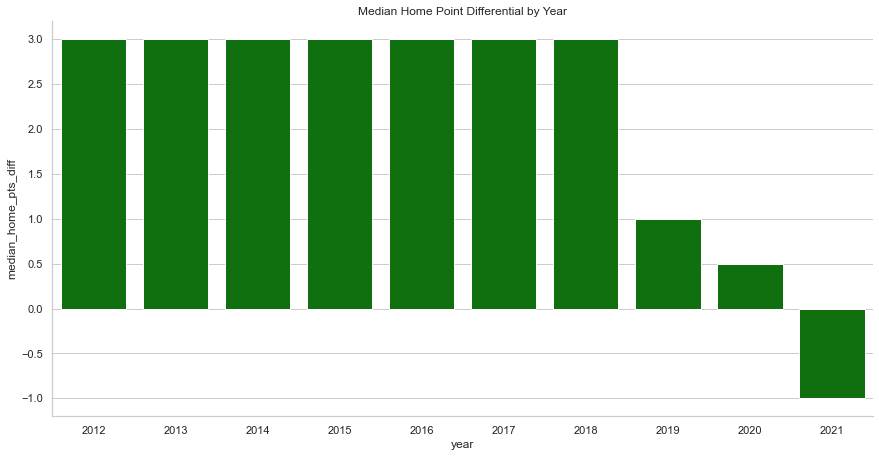

In [127]:
sns.barplot(data=score_agg_by_year,
            x='year',
            y='median_home_pts_diff',
            color='green'
           ).set_title('Median Home Point Differential by Year')

sns.despine();

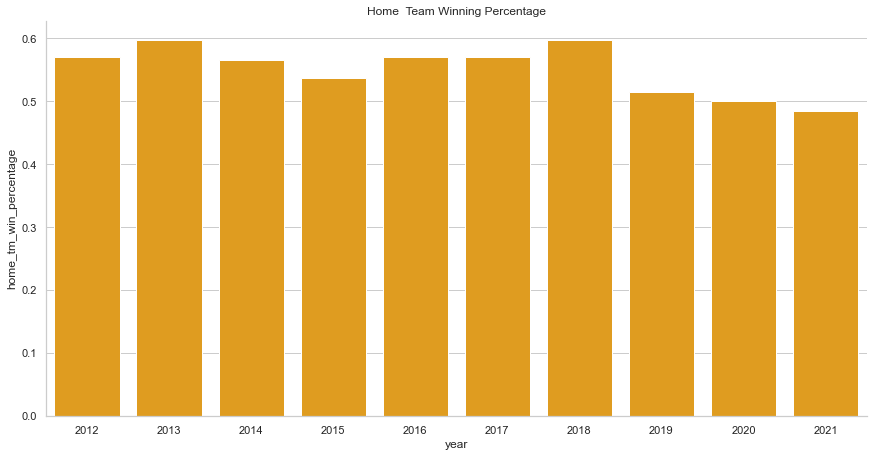

In [128]:
sns.barplot(data=score_agg_by_year,
             x='year',
             y='home_tm_win_percentage',
            color='orange'
           ).set_title('Home  Team Winning Percentage')

sns.despine();

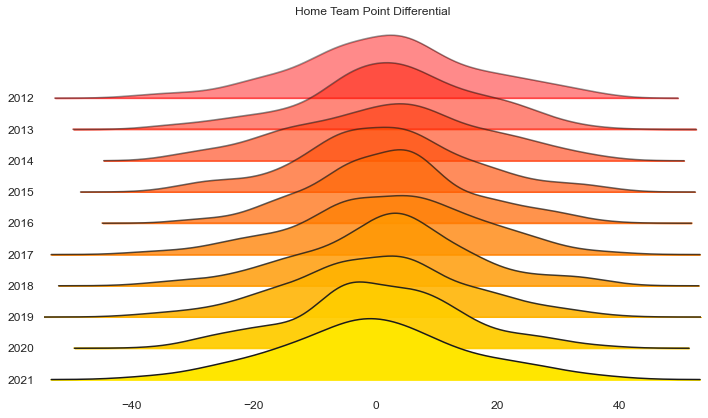

In [132]:
joyplot(scores.query("(home_pts_diff > -40) & (home_pts_diff < 40)"),
        by='year',
        column='home_pts_diff',
        colormap = cm.autumn,
        title = 'Home Team Point Differential',
        range_style = 'own',
        figsize = (10,6),
        fade = True);